In [23]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
# Loading data
file_path = Path("Resources/clean_data.csv")
df1 = pd.read_csv(file_path)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,2,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,3,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,4,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [25]:
df1.drop(columns=['id'], inplace = True)

In [26]:
numeric= pd.get_dummies(df1)
numeric

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,70.15,29.8,0,0,1,0,0,1,0,0,1,0,0
4977,1,40.0,0,0,1,191.15,31.1,0,0,1,0,0,0,1,0,0,0,1
4978,0,45.0,1,0,1,95.02,31.8,0,1,0,0,0,1,0,0,0,0,1
4979,1,40.0,0,0,1,83.94,30.0,0,0,1,0,0,1,0,0,0,0,1


In [27]:
# Define features set
X = numeric.copy()
X.drop("stroke", axis=1, inplace=True)
X.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,0,1,0,0,0,1,0,1,0,0


In [28]:
# Define target vector
y = numeric["stroke"].values.reshape(-1, 1)
y[:5]


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [29]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [32]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [33]:
# Creating the Random Forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [34]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\Celvir\AppData\Local\Temp\ipykernel_30428\478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [35]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [36]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [37]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1173,4
Actual 1,69,0


Accuracy Score : 0.9414125200642055
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.48      1246
weighted avg       0.89      0.94      0.92      1246



In [38]:
# Calculate Features importance
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sort by importance (impurity-based )
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.263466685574166, 'avg_glucose_level'),
 (0.23744954547633673, 'age'),
 (0.23004184996162325, 'bmi'),
 (0.03457898255280719, 'gender'),
 (0.02694674235782095, 'hypertension'),
 (0.02123869274421731, 'smoking_status_never smoked'),
 (0.021161050357138705, 'work_type_Private'),
 (0.02079577244675949, 'Residence_type_Urban'),
 (0.02037447065497572, 'Residence_type_Rural'),
 (0.019781651909699143, 'ever_married'),
 (0.019496822204193895, 'smoking_status_Unknown'),
 (0.018889456285918652, 'smoking_status_formerly smoked'),
 (0.018181930839181026, 'heart_disease'),
 (0.018128983355092464, 'work_type_Self-employed'),
 (0.015328078259978863, 'smoking_status_smokes'),
 (0.013151414714765924, 'work_type_Govt_job'),
 (0.0009878703053246103, 'work_type_children')]

<AxesSubplot:title={'center':'Features Importances'}, xlabel='1'>

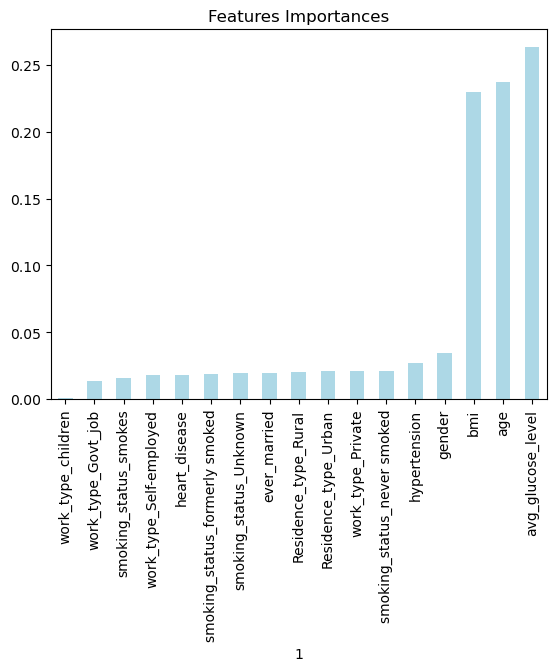

In [39]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='bar', color='lightblue', title= 'Features Importances', legend=False)